Install Berthopic

In [32]:
# #!pip install bertopic
# !pip install python-docx

In [222]:
from bertopic import BERTopic
#from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import nltk

In [223]:
with open('../quint/data/sample_texts/joe_rogan_tr.txt') as f:
    doc = f.readlines()
doc = doc[0].replace("?", ".")
sentences = doc.split('.')


In [224]:
from nltk.corpus import stopwords 
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize 

def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized



In [225]:
sentences_clean = [' '.join(clean(each)) for each in sentences]

In [226]:
data = pd.DataFrame(sentences_clean)
data.columns = ['text']
data['len'] = data['text'].apply(lambda x: len(x))
data['len_cum'] = data['len'].cumsum()
data['row'] = sentences

In [235]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer

# Train BERTopic with a custom CountVectorizer
vectorizer_model = TfidfVectorizer(min_df=5, max_df=95, ngram_range=(1, 3), stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model, language="english", calculate_probabilities=True, verbose=True, nr_topics='auto', n_gram_range=(1, 3),diversity=0.5)
topics, probs = topic_model.fit_transform(sentences_clean)

Batches: 100%|██████████| 60/60 [00:11<00:00,  5.17it/s]
2022-08-31 10:32:03,642 - BERTopic - Transformed documents to Embeddings
2022-08-31 10:32:08,903 - BERTopic - Reduced dimensionality
2022-08-31 10:32:09,103 - BERTopic - Clustered reduced embeddings
2022-08-31 10:32:24,192 - BERTopic - Reduced number of topics from 48 to 35


In [236]:
topics_over_time = topic_model.topics_over_time(sentences_clean, topics, data['len_cum'], nr_bins=100)


100it [02:08,  1.29s/it]


In [ ]:
topics_over_time

,Topic,Words,Frequency,Timestamp,Name
0,-1,"work, thing, president, time, program",13,-77.678,-1_thing_president_think_program
1,0,"work, think, state, idea, thing",2,-77.678,0_work_like_think_state
2,2,"thing, like, say, saying, place",1,-77.678,2_like_thing_say_saying
3,3,"like, make, life, country, stuff",2,-77.678,3_yeah_make_life_country
4,4,"government, time, state, say, year",1,-77.678,4_government_time_state_say
...,...,...,...,...,...
588,1,"government, program, say, state, united state",1,81028.576,1_government_program_say_state
589,-1,"think, thing, president, program, say",10,81355.288,-1_thing_president_think_program
590,0,"think, work, idea, thing, fact",1,81355.288,0_work_like_think_state
591,1,"government, program, say, state, united state",1,81355.288,1_government_program_say_state


In [213]:
data

,text,len,len_cum
0,okay,4,4
1,professional,12,16
2,people like live,16,32
3,thing like,10,42
4,taking money russian,20,62
...,...,...,...
1884,open possibility,16,81661
1885,take care,9,81670
1886,bye,3,81673
1887,take care,9,81682


In [250]:
import numpy as np
from scipy.signal import butter,filtfilt

# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 3      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.4 * fs  # Nyquist Frequency
order = 6      # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [251]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

topic1 = topics_over_time.loc[topics_over_time.Topic ==1][['Timestamp', 'Frequency']]
array = butter_lowpass_filter(topic1['Frequency'],cutoff, fs, order)

In [252]:
__ = data.loc[(data['len_cum']>40000) & (data['len_cum']<50000)]
for each in __.row:
    print(each)

 It was a document tailor made to deceive and mislead the Congress and the public of the United States
 And it was effective in doing that
 And in 2012, what I realized was this is what real world conspiracies look like, right
 It doesn't have to be smoking men behind closed doors
 It's lawyers and politicians
 It's ordinary people from the working level to the management level who go, if we don't explain this in a certain way, we're all going to lose our jobs or the other way they go, we're going to get something out of this if we all work together
 Civilization is the history of conspiracy, right
 What is civilization but a conspiracy for all of us to do better by working together
 But it's this kind of thing that I think too often we forget because it's boring as hell
 I want all your listeners, right, to go to the Washington Post because this document that I discovered that really changed me has been published courtesy of the Washington Post
 It's called the Inspector General's Rep

In [253]:
topics_over_time_clean

,Topic,Words,Frequency,Timestamp
0,-1,"post, sort, happened, mean, government",9,-77.678
1,0,"book, talk, government, like, sort",3,-77.678
3,4,"know, thing, turn, happy, took",2,-77.678
4,8,"book, read, permanent, case, let",4,-77.678
5,11,"okay, sorry, sure, completely, good",1,-77.678
...,...,...,...,...
730,16,"happening, kind, time, actively, chance",1,80865.220
731,19,"say, said, yeah, told, maybe",1,80865.220
732,23,"record, permanent, called, read, warrant",1,80865.220
733,27,"really, body, good, pretty, man",4,80865.220


In [254]:
topics_over_time_clean = topics_over_time.loc[topics_over_time.Topic != 1]
topics_over_time_clean.groupby('Timestamp')['Topic'].max()

Timestamp
-77.678       24
 820.780      29
 1637.560     28
 2454.340     29
 3271.120     22
              ..
 77598.100    18
 78414.880    29
 79231.660    23
 80048.440    23
 80865.220    29
Name: Topic, Length: 100, dtype: int64

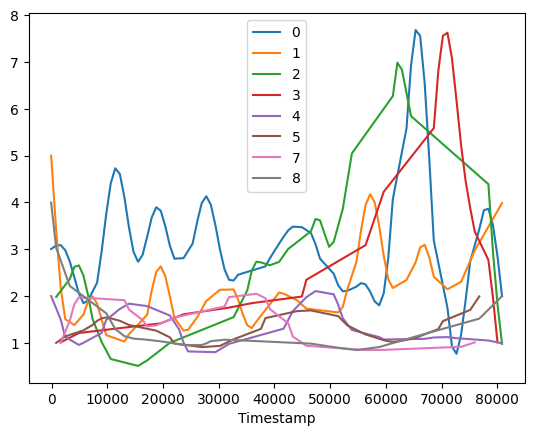

In [256]:
import seaborn as sns
df_final = pd.DataFrame()
for each in set(topics_over_time['Topic']) - set([-1]):
    try:
        df_temp = topics_over_time.loc[topics_over_time.Topic == each][['Timestamp', 'Frequency']]
        array = butter_lowpass_filter(df_temp['Frequency'],cutoff, fs, order)
        sns.lineplot(y=array, x=df_temp['Timestamp'], label=each)
        
    except Exception:
        continue

In [244]:
df_final

,Timestamp,Frequency,Topic
1,NaN,2.987334,0
11,NaN,2.983861,0
21,NaN,2.921842,0
32,NaN,2.767925,0
40,NaN,2.535044,0
...,...,...,...
698,NaN,3.835018,0
702,NaN,3.935450,0
709,NaN,3.578599,0
716,NaN,2.850561,0


<AxesSubplot:xlabel='Timestamp'>

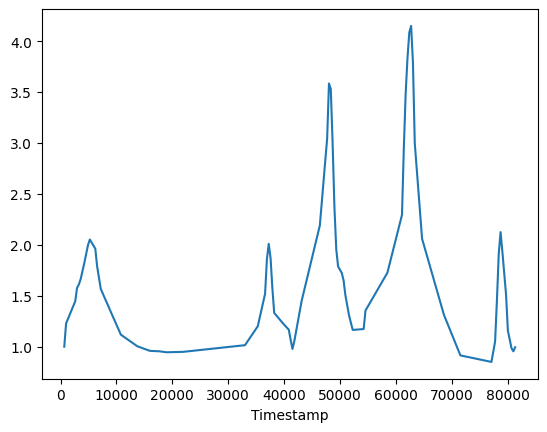

In [188]:
topics_over_time_clean.groupby('Timestamp')['Topic'].max()

In [ ]:
for topic in topics_over_time.Topics.unique():
    

In [232]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=5)


In [154]:
topic_model.generate_topic_labels()

['-1_government_system_like',
 '0_government_story_new',
 '1_bad_world_changed',
 '2_call_use_network',
 '3_office_information_system',
 '4_working_agency_building',
 '5_understand_think_many',
 '6_go_back_going',
 '7_remember_forget_matter',
 '8_right_wrong_exactly',
 '9_public_across_happening',
 '10_book_read_lot',
 '11_stay_make_need',
 '12_president_administration_power',
 '13_see_talking_might',
 '14_law_court_legal',
 '15_thing_new_funny',
 '16_okay_sorry_well',
 '17_happened_happening_never',
 '18_court_defense_even',
 '19___',
 '20_end_call_go',
 '21_intelligence_community_sort',
 '22_got_take_put',
 '23_say_done_said',
 '24_talk_nobody_talking',
 '25_answer_know_fact',
 '26_guy_want say_top',
 '27_good_man_pretty',
 '28_year_month_long time',
 '29_program_unless_access',
 '30_house_hit_today',
 '31_record_company_permanent',
 '32_exactly_yeah_always',
 '33_google_internet_could see']

In [105]:
topic_model.get_topics()[3]

[('think', 0.21057979951448294),
 ('like', 0.14080845073486772),
 ('go', 0.12430413138397448),
 ('good', 0.11233035516129458),
 ('long', 0.09362489792867251),
 ('time', 0.08702623295152322),
 ('look', 0.06986673962613954),
 ('way', 0.06057086750213187),
 ('kind', 0.060434014892468677),
 ('people', 0.05905976052509297)]

In [107]:
hierarchical_topics = topic_model.hierarchical_topics(sentences_clean, topics)

100%|██████████| 4/4 [00:00<00:00, 190.29it/s]


In [108]:
tree = topic_model.get_topic_tree(hierarchical_topics)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


In [63]:
# topics_to_merge = [0, 1]
# topic_model.merge_topics(sentences_clean, topics, topics_to_merge)

In [109]:
topic_model.visualize_topics()

In [126]:
df = pd.DataFrame(sentences, topics).reset_index()
df.columns = ['topics', 'docs']
#df = df.loc[df['topics']!=-1]

In [127]:
from locale import normalize
df.topics.value_counts(normalize=True)

-1    0.740603
 0    0.093700
 1    0.051879
 2    0.049762
 3    0.033880
 4    0.030175
Name: topics, dtype: float64

In [128]:
from scipy.stats import mode


df['rolling'] = df['topics'].rolling(20).apply(lambda x: mode(x)[0])
#df[['len_cum', 'rolling']].head(100).plot('rolling')

df= df.fillna(-1)

In [132]:
df = df.loc[df.topics==-1]
df

,topics,docs,rolling
0,-1,Okay,-1.0
2,-1,"People are like, how do you live",-1.0
4,-1,They're taking money from the russians,-1.0
5,-1,"And of course the answer is no, but I do this...",-1.0
9,-1,My own setup,-1.0
...,...,...,...
1884,-1,Open the possibility,-1.0
1885,-1,Take care,-1.0
1886,-1,Bye,-1.0
1887,-1,Take care,-1.0


In [133]:

text = ''
for num, each in enumerate(df['docs']):
    if df['rolling'].iloc[num] != df['rolling'].iloc[num-1]:
        text+=f' \n \n  {each}. '
    else:
        text+=f'{each}. '

In [ ]:
print(text)

In [124]:
topic_model.get_topic_tree(hierarchical_topics)

'.\n├─■──right_yeah_make_good_need ── Topic: 2\n└─thing_like_think_go_time\n     ├─thing_right_got_get_time\n     │    ├─■──thing_time_say_said_got ── Topic: 4\n     │    └─right_going_get_every_like\n     │         ├─■──get_going_like_want_one ── Topic: 0\n     │         └─■──right_every_little_know_even ── Topic: 1\n     └─■──think_like_go_good_long ── Topic: 3\n'

2022-08-31 09:02:09.007777: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-08-31 09:02:09.024383: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-31 09:02:09.024406: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Shape of initial_state_logits: (10, 10)
Shape of transition probs: (10, 10, 10)
Example initial state logits for num_states==3:
[  -0.   -0.   -0. -100. -100. -100. -100. -100. -100. -100.]
Example transition_probs for num_states==3:
[[0.95  0.025 0.025 0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.95  0.025 0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.025 0.95  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]


2022-08-31 09:02:12.015508: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-31 09:02:12.015569: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-31 09:02:12.015611: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-533EO63): /proc/driver/nvidia/version does not exist
2022-08-31 09:02:12.017494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
